In [1]:
%%bash
pyenv virtualenvs

bash: line 1: pyenv: command not found


In [3]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras as keras
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, f1_score
import IPython.display as ipd
%matplotlib inline

RANDOM_STATE = 1

In [4]:
data = pd.read_csv("/creditcard.csv")
data = data.dropna()
data = data.drop (['Time'], axis = 1)
data.head()

FileNotFoundError: ignored

In [ ]:
# Split into 3 equal sized dataset for the 3 nodes

from sklearn.model_selection import train_test_split
from collections import Counter

df23_x, df1_x, df23_y, df1_y = train_test_split(data.drop('Class', axis = 1), data['Class'], test_size=0.33, random_state=RANDOM_STATE, stratify=data['Class'])

df3_x, df2_x, df3_y, df2_y = train_test_split(df23_x, df23_y, test_size=0.5, random_state=RANDOM_STATE, stratify=df23_y)

# Split each node dataset into train (80%) and test (20%)

df1_x_train, df1_x_test, df1_y_train, df1_y_test = train_test_split(df1_x, df1_y, test_size=0.2, random_state=RANDOM_STATE, stratify=df1_y)
df2_x_train, df2_x_test, df2_y_train, df2_y_test = train_test_split(df2_x, df2_y, test_size=0.2, random_state=RANDOM_STATE, stratify=df2_y)
df3_x_train, df3_x_test, df3_y_train, df3_y_test = train_test_split(df3_x, df3_y, test_size=0.2, random_state=RANDOM_STATE, stratify=df3_y)

In [ ]:
# Normalization
for feat in df1_x_train.columns.values:
    ss = StandardScaler()
    df1_x_train[feat] = ss.fit_transform(df1_x_train[feat].values.reshape(-1,1))
    df1_x_test[feat] = ss.transform(df1_x_test[feat].values.reshape(-1,1))

for feat in df2_x_train.columns.values:
    ss = StandardScaler()
    df2_x_train[feat] = ss.fit_transform(df2_x_train[feat].values.reshape(-1,1))
    df2_x_test[feat] = ss.transform(df2_x_test[feat].values.reshape(-1,1))

for feat in df3_x_train.columns.values:
    ss = StandardScaler()
    df3_x_train[feat] = ss.fit_transform(df3_x_train[feat].values.reshape(-1,1))
    df3_x_test[feat] = ss.transform(df3_x_test[feat].values.reshape(-1,1))

In [ ]:
# Show the proportion of positive and negative classes of the dataset
total_data_size = data.shape[0]
total_negative_samples = Counter(data['Class'])[0]
total_positive_samples = Counter(data['Class'])[1]
print('Initial positive sampels={:.2f}%'.format(total_positive_samples*100/total_data_size))

print('----------Dataframe 1---------')
print('X train shape={:.2f}% {}, X test shape={:.2f}% {}'.format(
    df1_x_train.shape[0]*100/total_data_size, df1_x_train.shape, df1_x_test.shape[0]*100/total_data_size, df1_x_test.shape))
print('Y train shape={}, Y test shape={}'.format(df1_y_train.shape, df1_y_test.shape))
print(sorted(Counter(df1_y_train).items()))
print(sorted(Counter(df1_y_test).items()))
print('Positive in train (over all positives)={:.2f}%'.format(Counter(df1_y_train)[1]*100/total_positive_samples))
print('Positive in test (over all positives)={:.2f}%'.format(Counter(df1_y_test)[1]*100/total_positive_samples))

print('----------Dataframe 2---------')
print('X train shape={:.2f}% {}, X test shape={:.2f}% {}'.format(
    df2_x_train.shape[0]*100/total_data_size, df2_x_train.shape, df2_x_test.shape[0]*100/total_data_size, df2_x_test.shape))
print('Y train shape={}, Y test shape={}'.format(df2_y_train.shape, df2_y_test.shape))
print(sorted(Counter(df2_y_train).items()))
print(sorted(Counter(df2_y_test).items()))
print('Positive in train (over all positives)={:.2f}%'.format(Counter(df2_y_train)[1]*100/total_positive_samples))
print('Positive in test (over all positives)={:.2f}%'.format(Counter(df2_y_test)[1]*100/total_positive_samples))

print('----------Dataframe 3---------')
print('X train shape={:.2f}% {}, X test shape={:.2f}% {}'.format(
    df3_x_train.shape[0]*100/total_data_size, df3_x_train.shape, df3_x_test.shape[0]*100/total_data_size, df3_x_test.shape))
print('Y train shape={}, Y test shape={}'.format(df3_y_train.shape, df3_y_test.shape))
print(sorted(Counter(df3_y_train).items()))
print(sorted(Counter(df3_y_test).items()))
print('Positive in train (over all positives)={:.2f}%'.format(Counter(df3_y_train)[1]*100/total_positive_samples))
print('Positive in test (over all positives)={:.2f}%'.format(Counter(df3_y_test)[1]*100/total_positive_samples))

Initial positive sampels=0.17%
----------Dataframe 1---------
X train shape=26.40% (75189, 29), X test shape=6.60% (18798, 29)
Y train shape=(75189,), Y test shape=(18798,)
[(0, 75059), (1, 130)]
[(0, 18766), (1, 32)]
Positive in train (over all positives)=26.42%
Positive in test (over all positives)=6.50%
----------Dataframe 2---------
X train shape=26.80% (76328, 29), X test shape=6.70% (19082, 29)
Y train shape=(76328,), Y test shape=(19082,)
[(0, 76196), (1, 132)]
[(0, 19049), (1, 33)]
Positive in train (over all positives)=26.83%
Positive in test (over all positives)=6.71%
----------Dataframe 3---------
X train shape=26.80% (76328, 29), X test shape=6.70% (19082, 29)
Y train shape=(76328,), Y test shape=(19082,)
[(0, 76196), (1, 132)]
[(0, 19049), (1, 33)]
Positive in train (over all positives)=26.83%
Positive in test (over all positives)=6.71%


## Node 1 - Trainig the model with raw data (highly umbalanced dataset). Setting just the class weight during training.

In [ ]:
# WITH RAW DATA (adding just class weight)

import tensorflow_addons as tfa

df1_x_train_less_val, df1_x_val, df1_y_train_less_val, df1_y_val = train_test_split(df1_x, df1_y, test_size=0.2, random_state=RANDOM_STATE, stratify=df1_y)

def get_model():
    return keras.models.Sequential([
        keras.layers.Input(shape=df1_x_train_less_val.shape[1:]),
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dropout(0.3),
        #keras.layers.Dense(100, activation="relu"),
        #keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])

model_1_LEO = keras.models.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=df1_x_train_less_val.shape[1:]),
    # keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    # keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid'),
    ])


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0559 - precision: 0.5096 - recall: 0.6154 - f1_score: 0.5575 - val_loss: 0.0279 - val_precision: 0.7419 - val_recall: 0.7188 - val_f1_score: 0.7302
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0222 - precision: 0.8034 - recall: 0.7231 - f1_score: 0.7611 - val_loss: 0.0233 - val_precision: 0.7333 - val_recall: 0.6875 - val_f1_score: 0.7097
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0153 - precision: 0.8426 - recall: 0.7000 - f1_score: 0.7647 - val_loss: 0.0156 - val_precision: 0.7419 - val_recall: 0.7188 - val_f1_score: 0.7302
Epoch 4/15
2350/2350 [========================

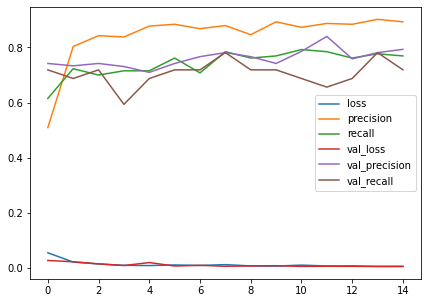

588/588 [==============================] - 1s 1ms/step - loss: 0.0031 - precision: 0.7742 - recall: 0.7500 - f1_score: 0.7619
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0669 - precision: 0.1898 - recall: 0.4000 - f1_score: 0.2574 - val_loss: 0.0161 - val_precision: 0.7407 - val_recall: 0.6250 - val_f1_score: 0.6780
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0215 - precision: 0.8667 - recall: 0.7000 - f1_score: 0.7745 - val_loss: 0.0154 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0153 - precision: 0.8350 - recall: 0.6615 - f1_score: 0.7382 - val_loss: 0.0135 - val_precision: 0.7188 - val_recall: 0.7188 - val_f1_score: 0.7188
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0101 - precision: 0.8621 - recall: 0.7692 - f1_score: 0.8130 - val_loss: 0.0156 - val_precision: 0.7667 - val_recall: 

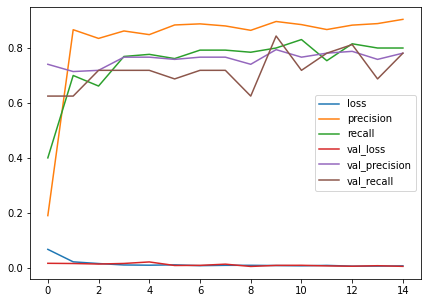

588/588 [==============================] - 1s 994us/step - loss: 0.0038 - precision: 0.7879 - recall: 0.8125 - f1_score: 0.8000
Epoch 1/15
2350/2350 [==============================] - 8s 3ms/step - loss: 0.0529 - precision: 0.1797 - recall: 0.4769 - f1_score: 0.2611 - val_loss: 0.0189 - val_precision: 0.7500 - val_recall: 0.5625 - val_f1_score: 0.6429
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0154 - precision: 0.8571 - recall: 0.6000 - f1_score: 0.7059 - val_loss: 0.0153 - val_precision: 0.7037 - val_recall: 0.5938 - val_f1_score: 0.6441
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0138 - precision: 0.8617 - recall: 0.6231 - f1_score: 0.7232 - val_loss: 0.0134 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0105 - precision: 0.8558 - recall: 0.6846 - f1_score: 0.7607 - val_loss: 0.0092 - val_precision: 0.8636 - val_recall

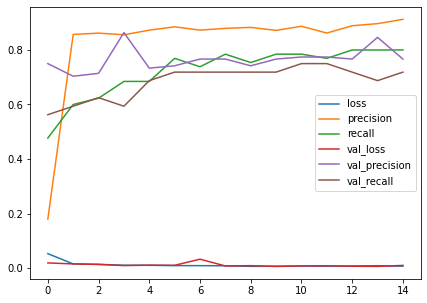

588/588 [==============================] - 1s 988us/step - loss: 0.0039 - precision: 0.7879 - recall: 0.8125 - f1_score: 0.8000
Epoch 1/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0494 - precision: 0.5125 - recall: 0.6308 - f1_score: 0.5655 - val_loss: 0.0159 - val_precision: 0.7500 - val_recall: 0.6562 - val_f1_score: 0.7000
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0179 - precision: 0.8641 - recall: 0.6846 - f1_score: 0.7639 - val_loss: 0.0150 - val_precision: 0.7600 - val_recall: 0.5938 - val_f1_score: 0.6667
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0120 - precision: 0.8545 - recall: 0.7231 - f1_score: 0.7833 - val_loss: 0.0160 - val_precision: 0.7667 - val_recall: 0.7188 - val_f1_score: 0.7419
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0124 - precision: 0.8739 - recall: 0.7462 - f1_score: 0.8050 - val_loss: 0.0120 - val_precision: 0.7667 - val_recall

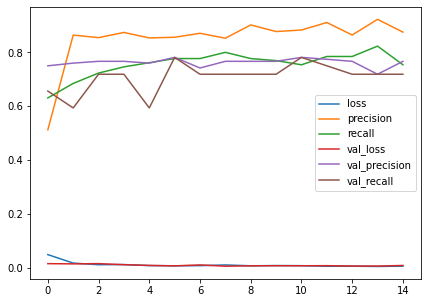

588/588 [==============================] - 1s 1ms/step - loss: 0.0031 - precision: 0.8065 - recall: 0.7812 - f1_score: 0.7937
Epoch 1/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0559 - precision: 0.2056 - recall: 0.5692 - f1_score: 0.3020 - val_loss: 0.0197 - val_precision: 0.7407 - val_recall: 0.6250 - val_f1_score: 0.6780
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0175 - precision: 0.8396 - recall: 0.6846 - f1_score: 0.7542 - val_loss: 0.0202 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0119 - precision: 0.8649 - recall: 0.7385 - f1_score: 0.7967 - val_loss: 0.0194 - val_precision: 0.7407 - val_recall: 0.6250 - val_f1_score: 0.6780
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0120 - precision: 0.8713 - recall: 0.6769 - f1_score: 0.7619 - val_loss: 0.0106 - val_precision: 0.7419 - val_recall: 

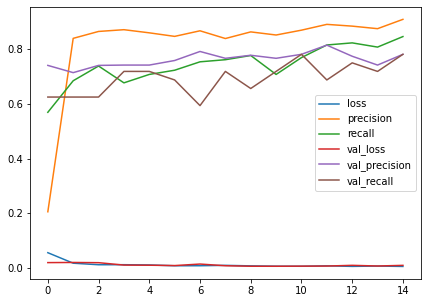

588/588 [==============================] - 1s 1ms/step - loss: 0.0044 - precision: 0.7879 - recall: 0.8125 - f1_score: 0.8000
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0508 - precision: 0.3969 - recall: 0.5923 - f1_score: 0.4753 - val_loss: 0.0762 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667
Epoch 2/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0185 - precision: 0.7424 - recall: 0.7538 - f1_score: 0.7481 - val_loss: 0.0175 - val_precision: 0.7419 - val_recall: 0.7188 - val_f1_score: 0.7302
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0143 - precision: 0.8361 - recall: 0.7846 - f1_score: 0.8095 - val_loss: 0.0119 - val_precision: 0.7143 - val_recall: 0.6250 - val_f1_score: 0.6667
Epoch 4/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0108 - precision: 0.8519 - recall: 0.7077 - f1_score: 0.7731 - val_loss: 0.0109 - val_precision: 0.7188 - val_recall: 

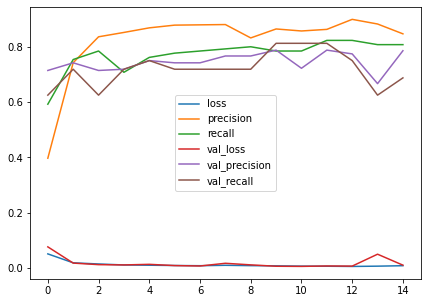

588/588 [==============================] - 1s 1ms/step - loss: 0.0033 - precision: 0.7333 - recall: 0.6875 - f1_score: 0.7097
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0644 - precision: 0.1976 - recall: 0.5000 - f1_score: 0.2832 - val_loss: 0.0121 - val_precision: 0.7407 - val_recall: 0.6250 - val_f1_score: 0.6780
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0156 - precision: 0.8529 - recall: 0.6692 - f1_score: 0.7500 - val_loss: 0.0083 - val_precision: 0.8000 - val_recall: 0.6250 - val_f1_score: 0.7018
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0104 - precision: 0.8246 - recall: 0.7231 - f1_score: 0.7705 - val_loss: 0.0117 - val_precision: 0.7500 - val_recall: 0.6562 - val_f1_score: 0.7000
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0083 - precision: 0.8158 - recall: 0.7154 - f1_score: 0.7623 - val_loss: 0.0097 - val_precision: 0.7419 - val_recall: 

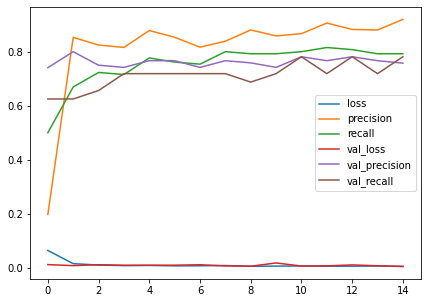

588/588 [==============================] - 1s 1ms/step - loss: 0.0044 - precision: 0.7647 - recall: 0.8125 - f1_score: 0.7879
Epoch 1/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0617 - precision: 0.5616 - recall: 0.6308 - f1_score: 0.5942 - val_loss: 0.0207 - val_precision: 0.7500 - val_recall: 0.6562 - val_f1_score: 0.7000
Epoch 2/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0214 - precision: 0.7815 - recall: 0.7154 - f1_score: 0.7470 - val_loss: 0.0090 - val_precision: 0.7667 - val_recall: 0.7188 - val_f1_score: 0.7419
Epoch 3/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0137 - precision: 0.8273 - recall: 0.7000 - f1_score: 0.7583 - val_loss: 0.0146 - val_precision: 0.7586 - val_recall: 0.6875 - val_f1_score: 0.7213
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0099 - precision: 0.8673 - recall: 0.7538 - f1_score: 0.8066 - val_loss: 0.0128 - val_precision: 0.7419 - val_recall: 

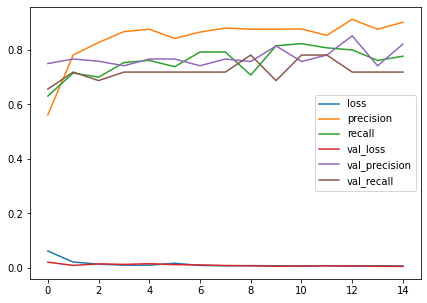

588/588 [==============================] - 1s 1ms/step - loss: 0.0031 - precision: 0.8000 - recall: 0.7500 - f1_score: 0.7742
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0532 - precision: 0.1988 - recall: 0.5000 - f1_score: 0.2845 - val_loss: 0.0191 - val_precision: 0.7917 - val_recall: 0.5938 - val_f1_score: 0.6786
Epoch 2/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0184 - precision: 0.8556 - recall: 0.5923 - f1_score: 0.7000 - val_loss: 0.0132 - val_precision: 0.7667 - val_recall: 0.7188 - val_f1_score: 0.7419
Epoch 3/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0124 - precision: 0.8636 - recall: 0.7308 - f1_score: 0.7917 - val_loss: 0.0174 - val_precision: 0.7500 - val_recall: 0.6562 - val_f1_score: 0.7000
Epoch 4/15
2350/2350 [==============================] - 4s 2ms/step - loss: 0.0120 - precision: 0.8482 - recall: 0.7308 - f1_score: 0.7851 - val_loss: 0.0136 - val_precision: 0.7667 - val_recall: 

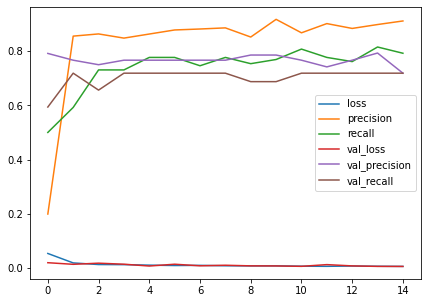

588/588 [==============================] - 1s 1ms/step - loss: 0.0039 - precision: 0.8125 - recall: 0.8125 - f1_score: 0.8125
Epoch 1/15
2350/2350 [==============================] - 6s 2ms/step - loss: 0.0776 - precision: 0.1777 - recall: 0.5154 - f1_score: 0.2643 - val_loss: 0.0260 - val_precision: 0.7419 - val_recall: 0.7188 - val_f1_score: 0.7302
Epoch 2/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0225 - precision: 0.7611 - recall: 0.6615 - f1_score: 0.7078 - val_loss: 0.0172 - val_precision: 0.8571 - val_recall: 0.5625 - val_f1_score: 0.6792
Epoch 3/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0130 - precision: 0.8916 - recall: 0.5692 - f1_score: 0.6948 - val_loss: 0.0137 - val_precision: 0.7308 - val_recall: 0.5938 - val_f1_score: 0.6552
Epoch 4/15
2350/2350 [==============================] - 5s 2ms/step - loss: 0.0106 - precision: 0.8660 - recall: 0.6462 - f1_score: 0.7401 - val_loss: 0.0137 - val_precision: 0.7500 - val_recall: 

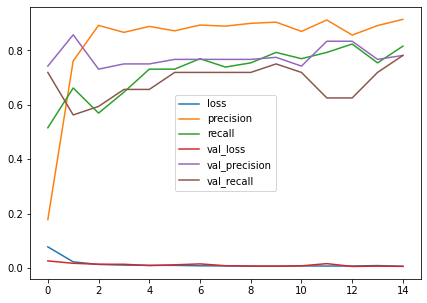

588/588 [==============================] - 1s 1ms/step - loss: 0.0042 - precision: 0.7576 - recall: 0.7812 - f1_score: 0.7692


In [ ]:
TH = 0.5
REPETITION = 10
results_unbalanced = {}
results_unbalanced['f1_score'] = []
results_unbalanced['precision'] = []
results_unbalanced['recall'] = []

class_weight = {0: 1.,
                1: 2.}

#input_ = keras.layers.Input(shape=df1_x_train.shape[1:])
#model = keras.Model(inputs=[input_], outputs=[base_model])

for i in range(REPETITION):
    model_1 = get_model()
    model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=[keras.metrics.Precision(name="precision", thresholds=TH), keras.metrics.Recall(name="recall", thresholds=TH), tfa.metrics.F1Score(num_classes=1, threshold=TH)]) # keras.metrics.AUC(name='auc'),

    history = model_1.fit(np.asarray(df1_x_train_less_val), np.asarray(df1_y_train_less_val), validation_data=(np.asarray(df1_x_val), np.asarray(df1_y_val)), batch_size=32, epochs=15)

    # Plotting history
    pd.DataFrame(history.history).plot(figsize=(7, 5))
    plt.show()

    # Evaluate on the test set
    result = model_1.evaluate(np.asarray(df1_x_test), np.asarray(df1_y_test), return_dict=True)
    results_unbalanced['f1_score'].append(result['f1_score'][0])
    results_unbalanced['precision'].append(result['precision'])
    results_unbalanced['recall'].append(result['recall'])

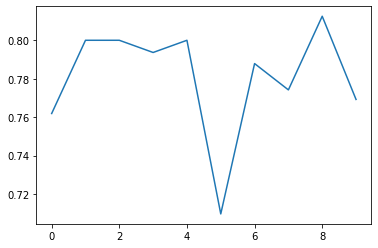

In [ ]:
plt.plot(results_unbalanced['f1_score'])

## RESAMPLING

In [ ]:
# RESAMPLING

from imblearn.combine import SMOTETomek

print(sorted(Counter(df1_y_train_less_val).items()))
smote_tomek = SMOTETomek(random_state=RANDOM_STATE)
df1_x_train_less_val_resampled, df1_y_train_less_val_resampled = smote_tomek.fit_resample(df1_x_train_less_val, df1_y_train_less_val)
print(sorted(Counter(df1_y_train_less_val_resampled).items()))

[(0, 75059), (1, 130)]
[(0, 75059), (1, 75059)]


Epoch 1/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.1066 - precision: 0.9795 - recall: 0.9603 - f1_score: 0.9698 - val_loss: 0.0210 - val_precision: 0.3256 - val_recall: 0.8750 - val_f1_score: 0.4746
Epoch 2/15
4692/4692 [==============================] - 7s 2ms/step - loss: 0.0192 - precision: 0.9948 - recall: 0.9936 - f1_score: 0.9942 - val_loss: 0.0139 - val_precision: 0.4000 - val_recall: 0.8750 - val_f1_score: 0.5490
Epoch 3/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0128 - precision: 0.9961 - recall: 0.9967 - f1_score: 0.9964 - val_loss: 0.0158 - val_precision: 0.3415 - val_recall: 0.8750 - val_f1_score: 0.4912
Epoch 4/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0103 - precision: 0.9965 - recall: 0.9976 - f1_score: 0.9970 - val_loss: 0.0193 - val_precision: 0.3293 - val_recall: 0.8438 - val_f1_score: 0.4737
Epoch 5/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0084 - precision: 

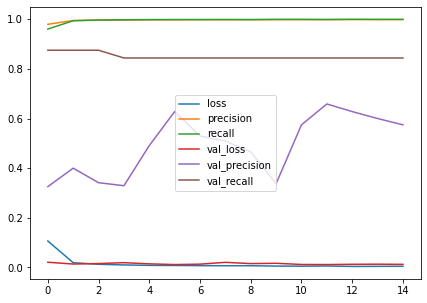

588/588 [==============================] - 1s 1ms/step - loss: 0.0123 - precision: 0.7105 - recall: 0.8438 - f1_score: 0.7714
Epoch 1/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.1477 - precision: 0.9774 - recall: 0.9546 - f1_score: 0.9659 - val_loss: 0.0245 - val_precision: 0.2828 - val_recall: 0.8750 - val_f1_score: 0.4275
Epoch 2/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0227 - precision: 0.9945 - recall: 0.9919 - f1_score: 0.9932 - val_loss: 0.0142 - val_precision: 0.4590 - val_recall: 0.8750 - val_f1_score: 0.6022
Epoch 3/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0122 - precision: 0.9964 - recall: 0.9971 - f1_score: 0.9967 - val_loss: 0.0116 - val_precision: 0.5192 - val_recall: 0.8438 - val_f1_score: 0.6429
Epoch 4/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0103 - precision: 0.9966 - recall: 0.9975 - f1_score: 0.9971 - val_loss: 0.0116 - val_precision: 0.4000 - val_recall: 

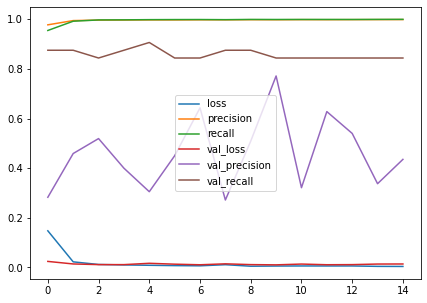

588/588 [==============================] - 1s 1ms/step - loss: 0.0122 - precision: 0.7647 - recall: 0.8125 - f1_score: 0.7879
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.1445 - precision: 0.9741 - recall: 0.9599 - f1_score: 0.9670 - val_loss: 0.0322 - val_precision: 0.1958 - val_recall: 0.8750 - val_f1_score: 0.3200
Epoch 2/15
4692/4692 [==============================] - 7s 2ms/step - loss: 0.0213 - precision: 0.9944 - recall: 0.9924 - f1_score: 0.9934 - val_loss: 0.0118 - val_precision: 0.5870 - val_recall: 0.8438 - val_f1_score: 0.6923
Epoch 3/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0155 - precision: 0.9952 - recall: 0.9960 - f1_score: 0.9956 - val_loss: 0.0169 - val_precision: 0.3415 - val_recall: 0.8750 - val_f1_score: 0.4912
Epoch 4/15
4692/4692 [==============================] - 7s 2ms/step - loss: 0.0096 - precision: 0.9968 - recall: 0.9982 - f1_score: 0.9975 - val_loss: 0.0140 - val_precision: 0.5000 - val_recall:

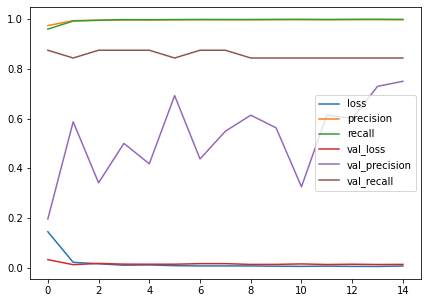

588/588 [==============================] - 1s 1ms/step - loss: 0.0131 - precision: 0.7714 - recall: 0.8438 - f1_score: 0.8060
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.1323 - precision: 0.9799 - recall: 0.9436 - f1_score: 0.9614 - val_loss: 0.0284 - val_precision: 0.3146 - val_recall: 0.8750 - val_f1_score: 0.4628
Epoch 2/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0215 - precision: 0.9950 - recall: 0.9909 - f1_score: 0.9929 - val_loss: 0.0180 - val_precision: 0.2784 - val_recall: 0.8438 - val_f1_score: 0.4186
Epoch 3/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0144 - precision: 0.9957 - recall: 0.9960 - f1_score: 0.9959 - val_loss: 0.0229 - val_precision: 0.1742 - val_recall: 0.8438 - val_f1_score: 0.2888
Epoch 4/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0103 - precision: 0.9966 - recall: 0.9974 - f1_score: 0.9970 - val_loss: 0.0201 - val_precision: 0.2222 - val_recall:

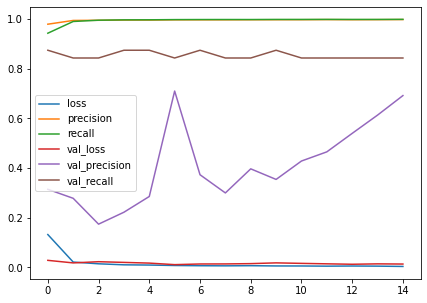

588/588 [==============================] - 1s 1ms/step - loss: 0.0129 - precision: 0.7647 - recall: 0.8125 - f1_score: 0.7879
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.1290 - precision: 0.9808 - recall: 0.9469 - f1_score: 0.9635 - val_loss: 0.0471 - val_precision: 0.2222 - val_recall: 0.8750 - val_f1_score: 0.3544
Epoch 2/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0236 - precision: 0.9949 - recall: 0.9886 - f1_score: 0.9917 - val_loss: 0.0260 - val_precision: 0.1739 - val_recall: 0.8750 - val_f1_score: 0.2902
Epoch 3/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0140 - precision: 0.9949 - recall: 0.9957 - f1_score: 0.9953 - val_loss: 0.0146 - val_precision: 0.3857 - val_recall: 0.8438 - val_f1_score: 0.5294
Epoch 4/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0117 - precision: 0.9954 - recall: 0.9972 - f1_score: 0.9963 - val_loss: 0.0147 - val_precision: 0.5000 - val_recall:

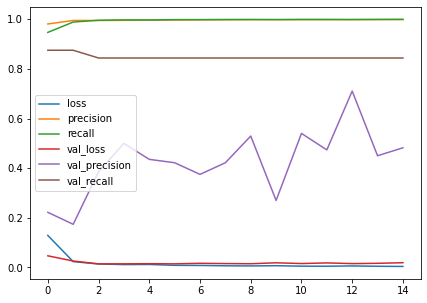

588/588 [==============================] - 1s 1ms/step - loss: 0.0234 - precision: 0.7297 - recall: 0.8438 - f1_score: 0.7826
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.1087 - precision: 0.9745 - recall: 0.9700 - f1_score: 0.9722 - val_loss: 0.0258 - val_precision: 0.3214 - val_recall: 0.8438 - val_f1_score: 0.4655
Epoch 2/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0204 - precision: 0.9943 - recall: 0.9944 - f1_score: 0.9943 - val_loss: 0.0165 - val_precision: 0.4912 - val_recall: 0.8750 - val_f1_score: 0.6292
Epoch 3/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0142 - precision: 0.9959 - recall: 0.9966 - f1_score: 0.9962 - val_loss: 0.0172 - val_precision: 0.3418 - val_recall: 0.8438 - val_f1_score: 0.4865
Epoch 4/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0096 - precision: 0.9966 - recall: 0.9978 - f1_score: 0.9972 - val_loss: 0.0181 - val_precision: 0.2784 - val_recall:

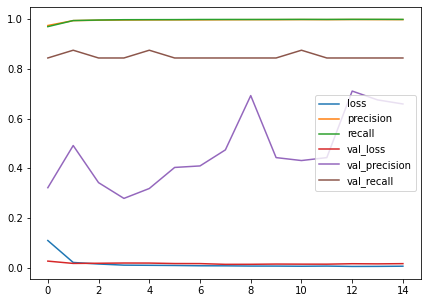

588/588 [==============================] - 1s 1ms/step - loss: 0.0184 - precision: 0.7714 - recall: 0.8438 - f1_score: 0.8060
Epoch 1/15
4692/4692 [==============================] - 13s 2ms/step - loss: 0.1217 - precision: 0.9826 - recall: 0.9474 - f1_score: 0.9647 - val_loss: 0.0491 - val_precision: 0.3636 - val_recall: 0.8750 - val_f1_score: 0.5138
Epoch 2/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0220 - precision: 0.9945 - recall: 0.9916 - f1_score: 0.9931 - val_loss: 0.0185 - val_precision: 0.2389 - val_recall: 0.8438 - val_f1_score: 0.3724
Epoch 3/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0151 - precision: 0.9957 - recall: 0.9959 - f1_score: 0.9958 - val_loss: 0.0156 - val_precision: 0.3214 - val_recall: 0.8438 - val_f1_score: 0.4655
Epoch 4/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.0106 - precision: 0.9964 - recall: 0.9975 - f1_score: 0.9969 - val_loss: 0.0141 - val_precision: 0.6000 - val_recall

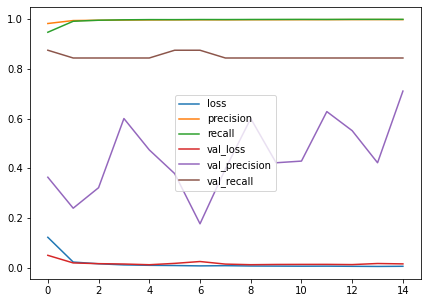

588/588 [==============================] - 1s 2ms/step - loss: 0.0142 - precision: 0.7500 - recall: 0.8438 - f1_score: 0.7941
Epoch 1/15
4692/4692 [==============================] - 11s 2ms/step - loss: 0.1111 - precision: 0.9804 - recall: 0.9501 - f1_score: 0.9650 - val_loss: 0.0342 - val_precision: 0.1918 - val_recall: 0.8750 - val_f1_score: 0.3146
Epoch 2/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0255 - precision: 0.9949 - recall: 0.9915 - f1_score: 0.9932 - val_loss: 0.0145 - val_precision: 0.3857 - val_recall: 0.8438 - val_f1_score: 0.5294
Epoch 3/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0122 - precision: 0.9959 - recall: 0.9966 - f1_score: 0.9962 - val_loss: 0.0215 - val_precision: 0.2617 - val_recall: 0.8750 - val_f1_score: 0.4029
Epoch 4/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.0112 - precision: 0.9957 - recall: 0.9973 - f1_score: 0.9965 - val_loss: 0.0165 - val_precision: 0.3218 - val_recall

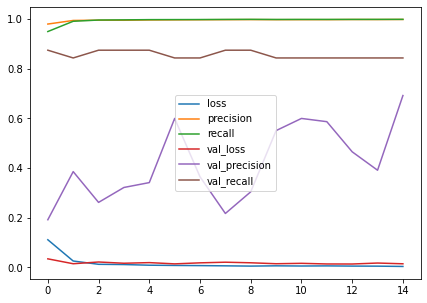

588/588 [==============================] - 1s 1ms/step - loss: 0.0154 - precision: 0.7222 - recall: 0.8125 - f1_score: 0.7647
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.1225 - precision: 0.9770 - recall: 0.9558 - f1_score: 0.9663 - val_loss: 0.0198 - val_precision: 0.3553 - val_recall: 0.8438 - val_f1_score: 0.5000
Epoch 2/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0216 - precision: 0.9947 - recall: 0.9920 - f1_score: 0.9933 - val_loss: 0.0149 - val_precision: 0.3836 - val_recall: 0.8750 - val_f1_score: 0.5333
Epoch 3/15
4692/4692 [==============================] - 8s 2ms/step - loss: 0.0142 - precision: 0.9959 - recall: 0.9958 - f1_score: 0.9959 - val_loss: 0.0129 - val_precision: 0.3600 - val_recall: 0.8438 - val_f1_score: 0.5047
Epoch 4/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0105 - precision: 0.9966 - recall: 0.9979 - f1_score: 0.9972 - val_loss: 0.0129 - val_precision: 0.5833 - val_recall:

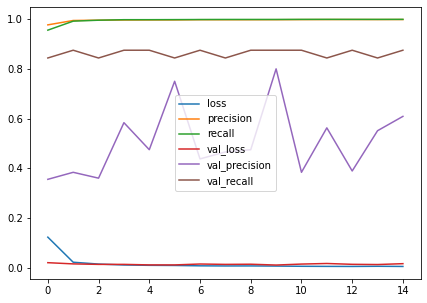

588/588 [==============================] - 1s 1ms/step - loss: 0.0148 - precision: 0.7647 - recall: 0.8125 - f1_score: 0.7879
Epoch 1/15
4692/4692 [==============================] - 10s 2ms/step - loss: 0.0972 - precision: 0.9801 - recall: 0.9662 - f1_score: 0.9731 - val_loss: 0.0431 - val_precision: 0.0996 - val_recall: 0.8750 - val_f1_score: 0.1789
Epoch 2/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0203 - precision: 0.9940 - recall: 0.9937 - f1_score: 0.9938 - val_loss: 0.0173 - val_precision: 0.2784 - val_recall: 0.8438 - val_f1_score: 0.4186
Epoch 3/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0127 - precision: 0.9956 - recall: 0.9967 - f1_score: 0.9961 - val_loss: 0.0135 - val_precision: 0.4154 - val_recall: 0.8438 - val_f1_score: 0.5567
Epoch 4/15
4692/4692 [==============================] - 9s 2ms/step - loss: 0.0098 - precision: 0.9965 - recall: 0.9977 - f1_score: 0.9971 - val_loss: 0.0160 - val_precision: 0.3649 - val_recall:

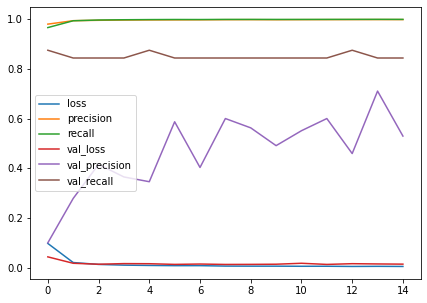

588/588 [==============================] - 1s 1ms/step - loss: 0.0164 - precision: 0.7500 - recall: 0.8438 - f1_score: 0.7941


In [ ]:
REPETITION = 10
results_resampling = {}
results_resampling['f1_score'] = []
results_resampling['precision'] = []
results_resampling['recall'] = []

for i in range(REPETITION):
    model_1 = get_model()
    model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=[keras.metrics.Precision(name="precision", thresholds=TH), keras.metrics.Recall(name="recall", thresholds=TH), tfa.metrics.F1Score(num_classes=1, threshold=TH)])

    history = model_1.fit(np.asarray(df1_x_train_less_val_resampled), np.asarray(df1_y_train_less_val_resampled), validation_data=(np.asarray(df1_x_val), np.asarray(df1_y_val)), batch_size=32, epochs=15)

    # Plotting history
    pd.DataFrame(history.history).plot(figsize=(7, 5))
    plt.show()

    # Evaluate on the test set
    result = model_1.evaluate(np.asarray(df1_x_test), np.asarray(df1_y_test), return_dict=True)
    results_resampling['f1_score'].append(result['f1_score'][0])
    results_resampling['precision'].append(result['precision'])
    results_resampling['recall'].append(result['recall'])

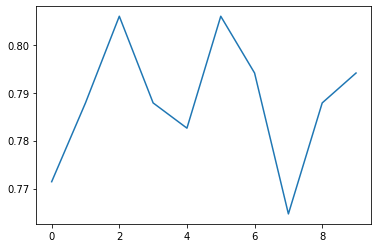

In [ ]:
plt.plot(results_resampling['f1_score'])

## BALANCE DATASET WITH GAN

"node1_twice_class_included.pkl" is the "df1_y_train_less_val" node 1 training set where we balance the classes with CTGAN model.

In [ ]:
import pickle5 as pickle  # !pip3 install pickle5
with open("node1_twice_class_included.pkl", "rb") as fh:
  df1_train_less_val_gan = pickle.load(fh)
df1_x_train_less_val_gan = df1_train_less_val_gan.iloc[:, data.columns != 'Class']
df1_y_train_less_val_gan = df1_train_less_val_gan.iloc[:, data.columns == 'Class']

In [ ]:
print(df1_train_less_val_gan.shape)
print(sorted(Counter(df1_y_train_less_val_gan['Class']).items()))

(150118, 30)
[(0, 75059), (1, 75059)]


Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.1040 - precision: 0.9826 - recall: 0.9936 - f1_score: 0.9881 - val_loss: 0.0142 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 2/15
4692/4692 [==============================] - 5s 1ms/step - loss: 0.0087 - precision: 0.9990 - recall: 0.9991 - f1_score: 0.9990 - val_loss: 0.0126 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 3/15
4692/4692 [==============================] - 5s 1ms/step - loss: 0.0064 - precision: 0.9993 - recall: 0.9993 - f1_score: 0.9993 - val_loss: 0.0080 - val_precision: 0.6923 - val_recall: 0.8438 - val_f1_score: 0.7606
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0049 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0085 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 5/15
4692/4692 [==============================] - 5s 1ms/step - loss: 0.0043 - precision: 

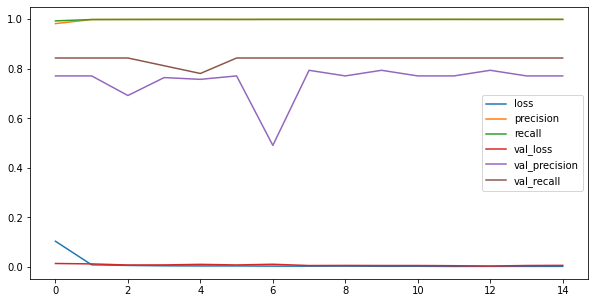

588/588 [==============================] - 1s 928us/step - loss: 0.0053 - precision: 0.7879 - recall: 0.8125 - f1_score: 0.8000
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0845 - precision: 0.9803 - recall: 0.9895 - f1_score: 0.9849 - val_loss: 0.0129 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0068 - precision: 0.9994 - recall: 0.9990 - f1_score: 0.9992 - val_loss: 0.0140 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0045 - precision: 0.9995 - recall: 0.9994 - f1_score: 0.9994 - val_loss: 0.0119 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 5s 1ms/step - loss: 0.0055 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0093 - val_precision: 0.7714 - val_recall

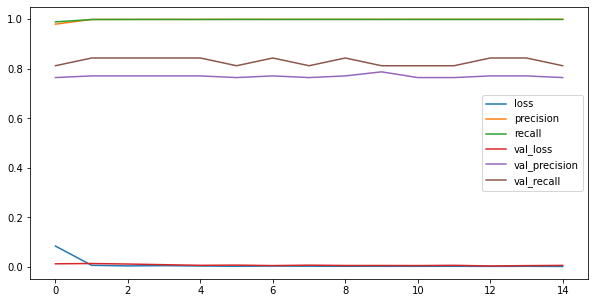

588/588 [==============================] - 1s 904us/step - loss: 0.0065 - precision: 0.6047 - recall: 0.8125 - f1_score: 0.6933
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.1465 - precision: 0.9785 - recall: 0.9643 - f1_score: 0.9713 - val_loss: 0.0154 - val_precision: 0.7222 - val_recall: 0.8125 - val_f1_score: 0.7647
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0076 - precision: 0.9994 - recall: 0.9990 - f1_score: 0.9992 - val_loss: 0.0111 - val_precision: 0.7500 - val_recall: 0.8438 - val_f1_score: 0.7941
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0050 - precision: 0.9995 - recall: 0.9994 - f1_score: 0.9994 - val_loss: 0.0092 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0045 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0088 - val_precision: 0.7647 - val_recall

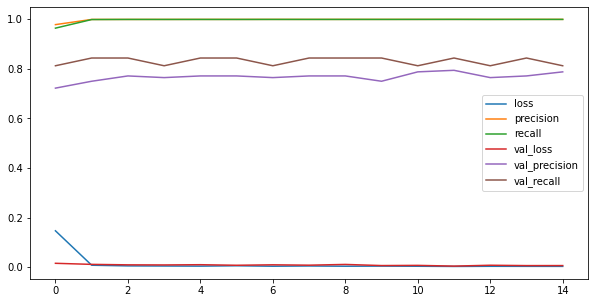

588/588 [==============================] - 1s 928us/step - loss: 0.0075 - precision: 0.5652 - recall: 0.8125 - f1_score: 0.6667
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.1057 - precision: 0.9816 - recall: 0.9928 - f1_score: 0.9872 - val_loss: 0.0248 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0095 - precision: 0.9991 - recall: 0.9991 - f1_score: 0.9991 - val_loss: 0.0163 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0063 - precision: 0.9993 - recall: 0.9993 - f1_score: 0.9993 - val_loss: 0.0090 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0050 - precision: 0.9994 - recall: 0.9993 - f1_score: 0.9993 - val_loss: 0.0065 - val_precision: 0.7714 - val_recall

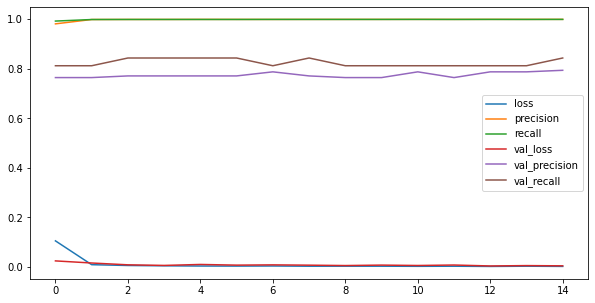

588/588 [==============================] - 1s 894us/step - loss: 0.0043 - precision: 0.7429 - recall: 0.8125 - f1_score: 0.7761
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.1045 - precision: 0.9723 - recall: 0.9899 - f1_score: 0.9810 - val_loss: 0.0123 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0061 - precision: 0.9993 - recall: 0.9991 - f1_score: 0.9992 - val_loss: 0.0101 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0042 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0077 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0040 - precision: 0.9996 - recall: 0.9994 - f1_score: 0.9995 - val_loss: 0.0074 - val_precision: 0.7647 - val_recall

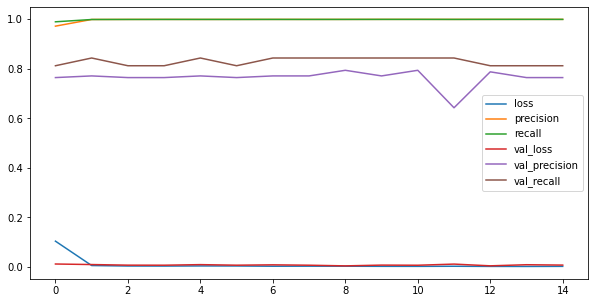

588/588 [==============================] - 1s 988us/step - loss: 0.0061 - precision: 0.6923 - recall: 0.8438 - f1_score: 0.7606
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0767 - precision: 0.9791 - recall: 0.9922 - f1_score: 0.9856 - val_loss: 0.0097 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0054 - precision: 0.9994 - recall: 0.9990 - f1_score: 0.9992 - val_loss: 0.0096 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0054 - precision: 0.9994 - recall: 0.9992 - f1_score: 0.9993 - val_loss: 0.0124 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0037 - precision: 0.9996 - recall: 0.9994 - f1_score: 0.9995 - val_loss: 0.0113 - val_precision: 0.7647 - val_recall

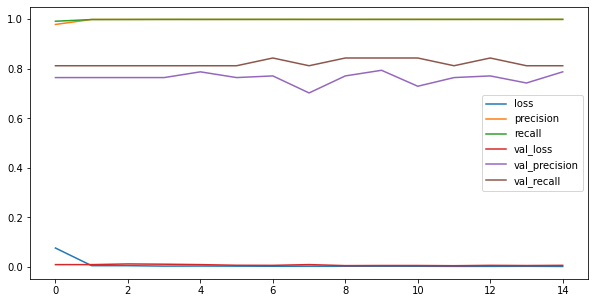

588/588 [==============================] - 1s 890us/step - loss: 0.0045 - precision: 0.7812 - recall: 0.7812 - f1_score: 0.7812
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0628 - precision: 0.9800 - recall: 0.9934 - f1_score: 0.9867 - val_loss: 0.0092 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 5s 1ms/step - loss: 0.0060 - precision: 0.9994 - recall: 0.9991 - f1_score: 0.9993 - val_loss: 0.0130 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0039 - precision: 0.9995 - recall: 0.9995 - f1_score: 0.9995 - val_loss: 0.0089 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0041 - precision: 0.9995 - recall: 0.9994 - f1_score: 0.9994 - val_loss: 0.0064 - val_precision: 0.7714 - val_recall

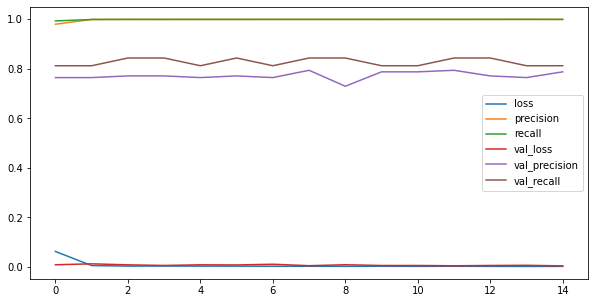

588/588 [==============================] - 1s 937us/step - loss: 0.0043 - precision: 0.7941 - recall: 0.8438 - f1_score: 0.8182
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.1321 - precision: 0.9769 - recall: 0.9669 - f1_score: 0.9719 - val_loss: 0.0098 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0062 - precision: 0.9995 - recall: 0.9989 - f1_score: 0.9992 - val_loss: 0.0098 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0049 - precision: 0.9994 - recall: 0.9990 - f1_score: 0.9992 - val_loss: 0.0091 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0048 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0109 - val_precision: 0.6923 - val_recall

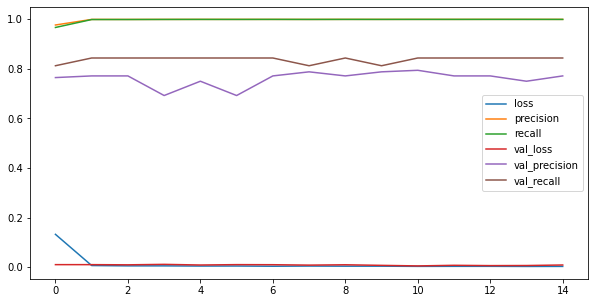

588/588 [==============================] - 1s 826us/step - loss: 0.0069 - precision: 0.7714 - recall: 0.8438 - f1_score: 0.8060
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0939 - precision: 0.9778 - recall: 0.9785 - f1_score: 0.9782 - val_loss: 0.0141 - val_precision: 0.7297 - val_recall: 0.8438 - val_f1_score: 0.7826
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0058 - precision: 0.9993 - recall: 0.9992 - f1_score: 0.9993 - val_loss: 0.0102 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0044 - precision: 0.9995 - recall: 0.9994 - f1_score: 0.9995 - val_loss: 0.0104 - val_precision: 0.7714 - val_recall: 0.8438 - val_f1_score: 0.8060
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0060 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0094 - val_precision: 0.7714 - val_recall

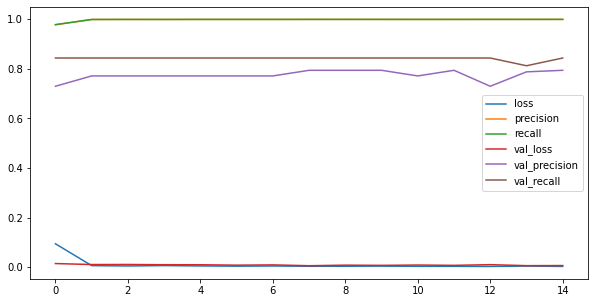

588/588 [==============================] - 1s 908us/step - loss: 0.0052 - precision: 0.7429 - recall: 0.8125 - f1_score: 0.7761
Epoch 1/15
4692/4692 [==============================] - 7s 1ms/step - loss: 0.0739 - precision: 0.9777 - recall: 0.9900 - f1_score: 0.9838 - val_loss: 0.0149 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 2/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0054 - precision: 0.9995 - recall: 0.9991 - f1_score: 0.9993 - val_loss: 0.0096 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 3/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0052 - precision: 0.9995 - recall: 0.9993 - f1_score: 0.9994 - val_loss: 0.0112 - val_precision: 0.7647 - val_recall: 0.8125 - val_f1_score: 0.7879
Epoch 4/15
4692/4692 [==============================] - 6s 1ms/step - loss: 0.0044 - precision: 0.9996 - recall: 0.9992 - f1_score: 0.9994 - val_loss: 0.0081 - val_precision: 0.7714 - val_recall

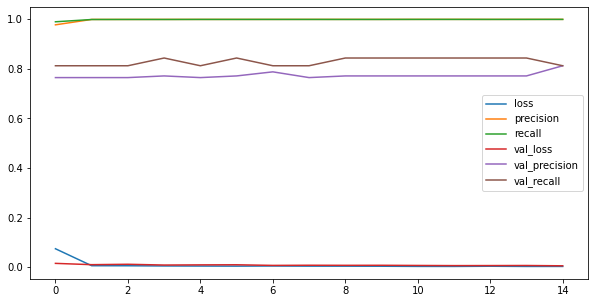

588/588 [==============================] - 1s 908us/step - loss: 0.0045 - precision: 0.7586 - recall: 0.6875 - f1_score: 0.7213


In [ ]:
REPETITION = 10
results_gan = {}
results_gan['f1_score'] = []
results_gan['precision'] = []
results_gan['recall'] = []

for i in range(REPETITION):
    model_1 = get_model()
    model_1.compile(loss="binary_crossentropy", optimizer="adam", metrics=[keras.metrics.Precision(name="precision", thresholds=TH), keras.metrics.Recall(name="recall", thresholds=TH), tfa.metrics.F1Score(num_classes=1, threshold=TH)])

    history = model_1.fit(np.asarray(df1_x_train_less_val_gan), np.asarray(df1_y_train_less_val_gan), validation_data=(np.asarray(df1_x_val), np.asarray(df1_y_val)), batch_size=32, epochs=15)

    # Plotting history
    pd.DataFrame(history.history).plot(figsize=(10, 5))
    plt.show()

    # Evaluate on the test set
    result = model_1.evaluate(np.asarray(df1_x_test), np.asarray(df1_y_test), return_dict=True)
    results_gan['f1_score'].append(result['f1_score'][0])
    results_gan['precision'].append(result['precision'])
    results_gan['recall'].append(result['recall'])

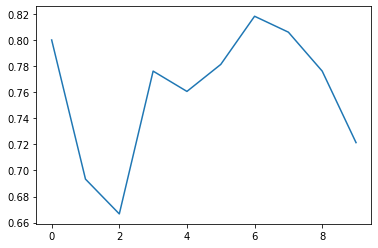

In [ ]:
plt.plot(results_gan['f1_score'])

## FEDERATED LEARNING

In [ ]:
!pip uninstall --yes tensorboard tb-nightly

!pip install --quiet --upgrade tensorflow-federated-nightly
!pip install --quiet --upgrade nest-asyncio
!pip install --quiet --upgrade tb-nightly  # or tensorboard, but not both

import nest_asyncio
nest_asyncio.apply()

Found existing installation: tb-nightly 2.6.0a20210607
Uninstalling tb-nightly-2.6.0a20210607:
  Successfully uninstalled tb-nightly-2.6.0a20210607


In [ ]:
import tensorflow_federated as tff
import collections
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
client_train_dataset = collections.OrderedDict()
client_train_dataset['client_1'] = collections.OrderedDict((('y', df1_y_train), ('x', df1_x_train)))
client_train_dataset['client_2'] = collections.OrderedDict((('y', df2_y_train), ('x', df2_x_train)))
client_train_dataset['client_3'] = collections.OrderedDict((('y', df3_y_train), ('x', df3_x_train)))
train_dataset = tff.simulation.datasets.TestClientData(client_train_dataset)

In [ ]:
NUM_CLIENTS = 3
NUM_EPOCHS = 15
BATCH_SIZE = 32
SHUFFLE_BUFFER = 100
PREFETCH_BUFFER = 10

def preprocess(dataset):
  def batch_format_fn(element):
    return collections.OrderedDict(
        x=element['x'],
        y=tf.reshape(element['y'], [-1, 1]))
  #return dataset.batch(BATCH_SIZE).map(batch_format_fn)
  return dataset.repeat(NUM_EPOCHS).shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE).map(batch_format_fn).prefetch(PREFETCH_BUFFER)
  

def make_federated_data(client_data, client_ids):
    return [preprocess(client_data.create_tf_dataset_for_client(x)) for x in client_ids]


In [ ]:
sample_clients = train_dataset.client_ids[0:NUM_CLIENTS] # ['client_1', 'client_2', 'client_3']

federated_train_data = make_federated_data(train_dataset, sample_clients)

print('Number of client datasets: {l}'.format(l=len(federated_train_data)))
print('First dataset: {d}'.format(d=federated_train_data[0]))

Number of client datasets: 3
First dataset: <PrefetchDataset shapes: OrderedDict([(x, (None, 29)), (y, (None, 1))]), types: OrderedDict([(x, tf.float64), (y, tf.int64)])>


In [ ]:
sample_dataset = train_dataset.create_tf_dataset_for_client(train_dataset.client_ids[0])
sample_element = next(iter(sample_dataset))
preprocessed_sample_dataset = preprocess(sample_dataset)

In [ ]:
preprocessed_sample_dataset.element_spec

OrderedDict([('x', TensorSpec(shape=(None, 29), dtype=tf.float64, name=None)),
             ('y', TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))])

### Create federated model

In [ ]:
from tensorflow.keras import optimizers
TH = 0.5

def model_tff():
  model = get_model()
  return tff.learning.from_keras_model(
      model,
      input_spec=preprocessed_sample_dataset.element_spec,
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=[
               tfa.metrics.F1Score(num_classes=1, threshold=TH),
               keras.metrics.Precision(name="precision", thresholds=TH),
               keras.metrics.Recall(name="recall", thresholds=TH)
              ])


In [ ]:
client_lr = 1e-3  # default for Keras Adam optimizer
server_lr = 1e-1

iterative_process = tff.learning.build_federated_averaging_process(
    model_tff,
    client_optimizer_fn=lambda: optimizers.Adam(learning_rate=client_lr),
    server_optimizer_fn=lambda: optimizers.SGD(learning_rate=server_lr))

### Run federated simulations

In [ ]:
# evaluation_process = tff.learning.build_federated_evaluation(model_tff)
import datetime
import nest_asyncio
nest_asyncio.apply()
%load_ext tensorboard


REPETITION = 10
results_fl = {}
results_fl['f1_score'] = []
results_fl['precision'] = []
results_fl['recall'] = []

for i in range(REPETITION):

    state = iterative_process.initialize()

    log_dir = "logs/fit/federated-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

    #%tensorboard --logdir logs/fit. # activate tensorflow in cell

    summary_writer_train = tf.summary.create_file_writer(log_dir+'/train')
    summary_writer_val = tf.summary.create_file_writer(log_dir+'/val')

    federated_model = None
    NUM_ROUNDS = 15
    for round_num in range(1, NUM_ROUNDS+1):

        #train_data_sharded = [federated_train_data[0].shard(num_shards=NUM_ROUNDS, index=NUM_ROUNDS-1), federated_train_data[1].shard(num_shards=NUM_ROUNDS, index=NUM_ROUNDS-1), federated_train_data[2].shard(num_shards=NUM_ROUNDS, index=NUM_ROUNDS-1)]
        #state, tff_metrics = iterative_process.next(state, train_data_sharded)
        
        state, tff_metrics = iterative_process.next(state, federated_train_data)
        
        federated_model = get_model()
        federated_model.compile(optimizer="adam",
                            loss=tf.keras.losses.BinaryCrossentropy(),
                            metrics=[
                                tfa.metrics.F1Score(num_classes=1, threshold=TH),
                                keras.metrics.Precision(name="precision", thresholds=TH),keras.metrics.Recall(name="recall", thresholds=TH)
                                ])
        state.model.assign_weights_to(model=federated_model)
        federated_result = federated_model.evaluate(np.asarray(df1_x_val), np.asarray(df1_y_val), verbose=0, return_dict=True)
        with summary_writer_train.as_default():
            for name, metric in tff_metrics['train'].items():
                if name=='f1_score':
                    tf.summary.scalar(name, metric[0], round_num)
                else:
                    tf.summary.scalar(name, metric, round_num)
        with summary_writer_val.as_default():
            for name, metric in federated_result.items():
                if name=='f1_score':
                    tf.summary.scalar(name, metric[0], round_num)
                else:
                    tf.summary.scalar(name, metric, round_num)    

    federated_test = federated_model.evaluate(np.asarray(df1_x_test), np.asarray(df1_y_test), verbose=0, return_dict=True)
    results_fl['f1_score'].append(federated_test['f1_score'][0])
    results_fl['precision'].append(federated_test['precision'])
    results_fl['recall'].append(federated_test['recall'])

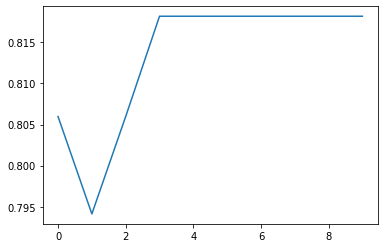

In [ ]:
plt.plot(results_fl['f1_score'])

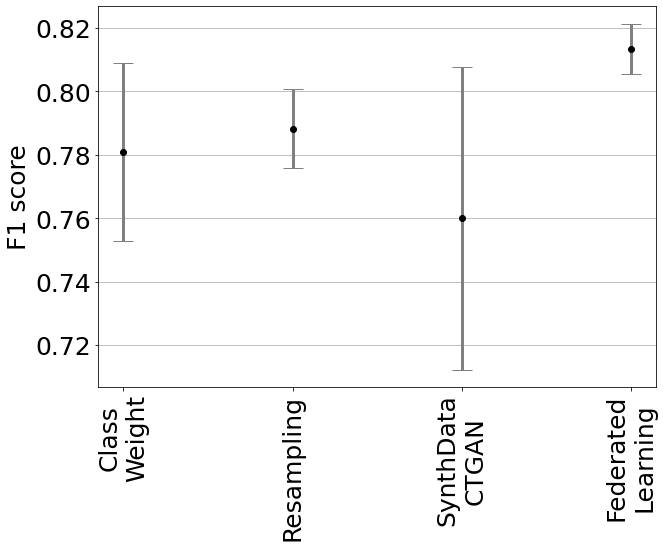

In [ ]:
plt.figure(figsize=(10,7))

plt.errorbar(1, np.mean(results_unbalanced['f1_score']), yerr=np.std(results_unbalanced['f1_score'], axis=0), fmt='ok', ecolor='gray',color='black',  elinewidth=3, capsize=10)

plt.errorbar(2, np.mean(results_resampling['f1_score']), yerr=np.std(results_resampling['f1_score'], axis=0), fmt='ok', color='black',  ecolor='gray', elinewidth=3, capsize=10)

plt.errorbar(3, np.mean(results_gan['f1_score']), yerr=np.std(results_gan['f1_score'], axis=0), fmt='ok', color='black',  ecolor='gray',elinewidth=3, capsize=10)

plt.errorbar(4, np.mean(results_fl['f1_score']), yerr=np.std(results_fl['f1_score'], axis=0), fmt='ok', color='black', ecolor='gray', elinewidth=3, capsize=10)

plt.ylabel('F1 score')
xlabels = ['Class\nWeight', 'Resampling', 'SynthData\nCTGAN', 'Federated\nLearning']
plt.xticks([1,2,3,4], xlabels, rotation='vertical')
plt.grid(axis='y')
plt.rcParams.update({'font.size': 25})
plt.savefig('./comparing.png', dpi=300, bbox_inches='tight')
plt.show()
